In [25]:
# !pip install notebook datashader holoviews hvplot fastparquet python-snappy
# !pip install panel hvplot

  Using cached jupyterlab_server-2.27.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.10.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached prometheus_client-0.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os,sys
import geopy

In [4]:
nb = pd.read_csv("../data/nb.csv")
# driver_locations_during_request
location = pd.read_csv("../data/driver_locations_during_request.csv")


In [13]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [5]:
nb.tail(20)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
536000,1637650,"6.4315814,3.4318486","6.455619200000001,3.5117174",2021-12-30 20:01:52,2021-12-30 21:20:47
536001,1637651,"6.5944951,3.3405505","6.453616,3.4027559",2021-12-30 20:01:53,2021-12-30 21:04:03
536002,1637663,"6.4494243,3.5248741","6.440401700000001,3.5110408",2021-12-30 20:18:39,2021-12-30 20:47:45
536003,1637666,"6.510129,3.3648035","6.5084404,3.598857",2021-12-30 20:10:10,2021-12-30 22:54:00
536004,1637667,"6.4274121,3.432003","6.448969300000001,3.5231794",2021-12-30 20:35:11,2021-12-30 21:57:38
536005,1637671,"6.456981331669058,3.4535614153080294","6.437123199999999,3.5053307",2021-12-30 20:27:01,2021-12-30 21:30:19
536006,1637672,"6.6543098,3.3039259","6.6024919,3.2940099",2021-12-30 20:30:21,2021-12-30 21:23:45
536007,1637674,"6.4315814,3.4318486","6.466666999999999,3.45",2021-12-30 20:21:54,2021-12-30 21:14:28
536008,1637676,"6.6161382,3.3733949","6.6660318,3.3240082",2021-12-30 20:20:59,2021-12-30 22:32:50
536009,1637677,"6.4522997,3.3989714","6.464988200000001,3.2848658",2021-12-30 21:02:25,2021-12-30 21:50:39


In [5]:
# # Convert timestamps to datetime format
nb["Trip Start Time"] = pd.to_datetime(nb["Trip Start Time"])
nb["Trip End Time"] = pd.to_datetime(nb["Trip End Time"])

# calculate duration in minutes
nb["duration_in_minutes"]= (nb["Trip End Time"]-nb["Trip Start Time"]).dt.total_seconds()/60
nb["duration_in_minutes"] = nb["duration_in_minutes"].round()
nb.head(5)


,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,duration_in_minutes
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,2.0
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.0
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.0
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,14.0
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,4.0


In [44]:
nb["duration_in_minutes"] = nb["duration_in_minutes"].astype(float)
print(nb["duration_in_minutes"])

0          2.0
1         29.0
2         41.0
3         14.0
4          4.0
          ... 
536015    28.0
536016    56.0
536017    50.0
536018    20.0
536019    89.0
Name: duration_in_minutes, Length: 536020, dtype: float64


In [5]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Trip ID              536020 non-null  int64         
 1   Trip Origin          536020 non-null  object        
 2   Trip Destination     536020 non-null  object        
 3   Trip Start Time      534369 non-null  datetime64[ns]
 4   Trip End Time        536019 non-null  datetime64[ns]
 5   duration_in_minutes  534368 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 24.5+ MB


In [6]:
nb["duration_in_minutes"].describe() 

count    534368.000000
mean         81.605278
std         797.344109
min           0.000000
25%          34.000000
50%          53.000000
75%          80.000000
max      296895.000000
Name: duration_in_minutes, dtype: float64

In [7]:
# nb.drop('duration_in_hours', axis=1, inplace= True) 
# nb.head(5)

In [19]:
nb['km/hr']= nb['distance_km']/(nb['duration_in_minutes']/60)
nb.head(10)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance_km,duration_in_minutes,speed_per_hour,km/hr
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,16.123451,2.0,483.703532,483.703532
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,1.884305,29.0,3.898562,3.898562
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,13.822393,41.0,20.227892,20.227892
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,1.511034,14.0,6.475861,6.475861
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,4.0,314.764786,314.764786
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51,8.127195,34.0,14.342109,14.342109
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12,5.040921,61.0,4.958283,4.958283
7,392013,"6.4308171,3.4341552","6.435460000000001,3.4846547",2021-07-01 08:44:09,2021-07-01 09:19:11,5.609962,35.0,9.617078,9.617078
8,392014,"6.499156300000001,3.3585173","6.4280911,3.5157172",2021-07-01 06:43:07,2021-07-01 07:27:24,19.082399,44.0,26.021454,26.021454
9,392017,"6.535043099999999,3.3316238","6.500039999999999,3.3248596",2021-07-01 06:49:37,2021-07-01 07:30:14,3.942580,41.0,5.769629,5.769629


In [20]:
nb.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time', 'distance_km', 'duration_in_minutes', 'speed_per_hour',
       'km/hr'],
      dtype='object')

In [10]:
nb.shape[0]

536020

In [2]:
nb.nunique()

NameError: name 'nb' is not defined

In [12]:
nb.dtypes


Trip ID                         int64
Trip Origin                    object
Trip Destination               object
Trip Start Time        datetime64[ns]
Trip End Time          datetime64[ns]
duration_in_minutes           float64
dtype: object

In [53]:
location.head(10)
# location.shape
# 1557740

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


In [14]:
import geopy.geocoders
from geopy.geocoders import Nominatim



# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="regionApp")

# Function to reverse geocode the coordinates and extract the region
def get_region(coordinates):
    location = geolocator.reverse(coordinates, language='en')
    if location:
        address = location.raw['address']
        region = address.get('state', address.get('county', address.get('city')))
        return region
    else:
        return None




In [15]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="regionApp")

# Function to reverse geocode the coordinates and extract the region
def get_region(coordinates):
    num_retries = 3
    for _ in range(num_retries):
        try:
            location = geolocator.reverse(coordinates, language='en')
            if location:
                address = location.raw['address']
                region = address.get('state', address.get('county', address.get('city')))
                return region
        except GeocoderUnavailable:
            # Wait for a short time before retrying
            continue
    return None

# Apply the get_region function to the 'Trip Origin' column and create a new 'user_region' column
nb['user_region'] = nb['Trip Origin'].apply(get_region)

print(nb)


KeyboardInterrupt: 

In [16]:
# Apply the get_region function to the 'Trip Origin' column and create a new 'user_region' column
nb['user_region'] = nb['Trip Origin'].apply(get_region)

print(nb)

KeyboardInterrupt: 

In [17]:
nb['Trip Origin'].head()

0    6.508813001668548,3.37740316890347
1                   6.4316714,3.4555375
2           6.631679399999999,3.3388976
3           6.572757200000001,3.3677082
4                   6.6010417,3.2766339
Name: Trip Origin, dtype: object

In [8]:
df= pd.DataFrame({
    'Trip Origin' : ['6.508813001668548,3.37740316890347', '6.4316714,3.4555375', '6.631679399999999,3.3388976', '6.572757200000001,3.3677082', '6.6010417,3.2766339']
})

# Apply the get_region function to the 'Trip Origin' column and create a new 'user_region' column
df['user_region'] = df['Trip Origin'].apply(get_region)

print(df)

NameError: name 'get_region' is not defined

In [19]:
location.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at'],
      dtype='object')

In [20]:
trip_start_timestamp = nb["Trip Start Time"]
c = pd.to_datetime(trip_start_timestamp)
mini_timestamp = min(c)
max_timestamp = max(c)
print(f"minimum timestamp is {mini_timestamp} and max timestamp is {max_timestamp}")
print(f"the data represent delivery order for timeframe from {mini_timestamp} to {max_timestamp}")

minimum timestamp is 2021-07-01 06:21:02 and max timestamp is 2022-06-13 10:04:28
the data represent delivery order for timeframe from 2021-07-01 06:21:02 to 2022-06-13 10:04:28


In [21]:
location.nunique()


id               1557740
order_id           26492
driver_id           1213
driver_action          2
lat               194406
lng               170385
created_at             0
updated_at             0
dtype: int64

In [22]:
location.shape

(1557740, 8)

In [67]:
# the accepted requests percent is just 1.6% 
accepted_requests =location[location["driver_action"] == "accepted"]
rejected_requests =location[location["driver_action"] == "rejected"]

accepted_request_percent= len(accepted_requests)/len(location)*100
rejected_request_percent= len(rejected_requests)/len(location)*100
unique_order_id = location["order_id"].nunique()
print(f"accepted_requests= {len(accepted_requests)} and rejected_requests={len(rejected_requests)}\n")
print(f"number of unique order id = {unique_order_id}\n")
print(f"accepted_request_percent= {accepted_request_percent} \n rejected_request_percent (unfulfilled requests)={rejected_request_percent}")


accepted_requests= 25903 and rejected_requests=1531837

number of unique order id = 26492

accepted_request_percent= 1.6628577297880265 
 rejected_request_percent (unfulfilled requests)=98.33714227021197


In [45]:
a = location.groupby("order_id")
a.count()

,id,driver_id,driver_action,lat,lng,created_at,updated_at
order_id,,,,,,,
392001,10,10,10,10,10,0,0
392005,51,51,51,51,51,0,0
392009,67,67,67,67,67,0,0
392013,13,13,13,13,13,0,0
392014,5,5,5,5,5,0,0
...,...,...,...,...,...,...,...
489898,20,20,20,20,20,0,0
490008,56,56,56,56,56,0,0
497721,3,3,3,3,3,0,0


In [58]:
# Assuming your dataframe is named 'df'
rejected_requests = location.loc[location['driver_action'] == 'rejected'].groupby('order_id').size()
print(rejected_requests)
rejected_requests.describe()

order_id
392001     9
392005    50
392009    66
392013    12
392014     4
          ..
489898    19
490008    55
497721     2
510268     3
517948    62
Length: 25367, dtype: int64


count    25367.000000
mean        60.386999
std        120.889090
min          1.000000
25%         12.000000
50%         28.000000
75%         57.000000
max       4121.000000
dtype: float64

# accepted_orders_percent

In [24]:
nunique_order_ids = location["order_id"].nunique()
nunique_order_ids

26492

In [25]:
accepted_orders =location[location["driver_action"] == "accepted"]
len(accepted_orders)


25903

In [26]:
accepted_orders_percent = len(accepted_orders)/nunique_order_ids*100
print(f"accepted_orders_percent= {accepted_orders_percent}")

accepted_orders_percent= 97.77668730182697


In [27]:
# --- ---- ----- ------ ------- --------

In [28]:
location.groupby("driver_action").nunique()
location.groupby("driver_action")

In [29]:
accepted_orders =location[location["driver_action"] == "accepted"]
accepted_orders.value_counts()

Series([], Name: count, dtype: int64)

In [30]:
rejected_orders.head(5)

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN


In [31]:
rejected_orders.nunique()
# location["order_id"].unique
location['driver_action'].value_counts()['rejected']
rejected_orders.value_counts


<bound method DataFrame.value_counts of               id  order_id  driver_id driver_action       lat       lng  \
1              2    392001     243588      rejected  6.592097  3.287445   
2              3    392001     243830      rejected  6.596133  3.281784   
3              4    392001     243539      rejected  6.596142  3.280526   
4              5    392001     171653      rejected  6.609232  3.288800   
5              6    392001     245662      rejected  6.593095  3.287759   
...          ...       ...        ...           ...       ...       ...   
1557735  1557736    517948     243774      rejected  6.469036  3.566877   
1557736  1557737    517948     245447      rejected  6.425431  3.527358   
1557737  1557738    517948     239866      rejected  6.440013  3.525378   
1557738  1557739    517948     243774      rejected  6.469036  3.566877   
1557739  1557740    517948     244170      rejected  6.469390  3.572079   

         created_at  updated_at  
1               NaN      

In [32]:
len(accepted_orders)/nunique_order_ids*100
# len(rejected_orders)/26492*100
# len(rejected_orders)

97.77668730182697

In [33]:
accepted_orders["created_at"].unique()

array([nan])

In [34]:
nb.shape

(536020, 6)

In [35]:
import pandas as pd

# Sample DataFrame
data = {'col1': [1, 2, 3], 'col2': ['apple', 'banana', 'cherry']}
df = pd.DataFrame(data)

# Show DataFrame with row numbers (original index becomes a new column)
df_with_row_numbers = df.reset_index(names="row_num")
print(df_with_row_numbers)


   row_num  col1    col2
0        0     1   apple
1        1     2  banana
2        2     3  cherry


# showing and removing outliers

In [7]:
nb["duration_in_minutes"].describe()


count    534368.000000
mean         81.605278
std         797.344109
min           0.000000
25%          34.000000
50%          53.000000
75%          80.000000
max      296895.000000
Name: duration_in_minutes, dtype: float64

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

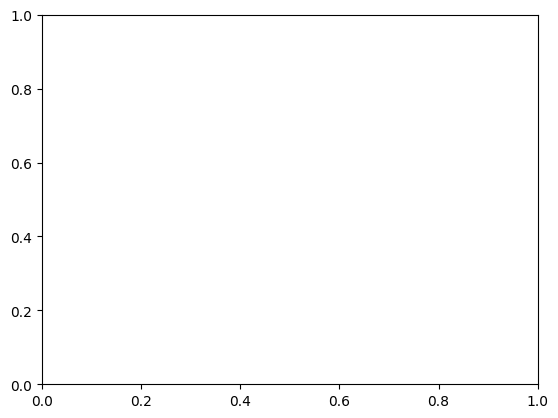

In [39]:
import matplotlib.pyplot as plt

plt.boxplot(nb['Trip Start Time'])
plt.ylabel('Values')
plt.title('Boxplot of the Data')
plt.show()


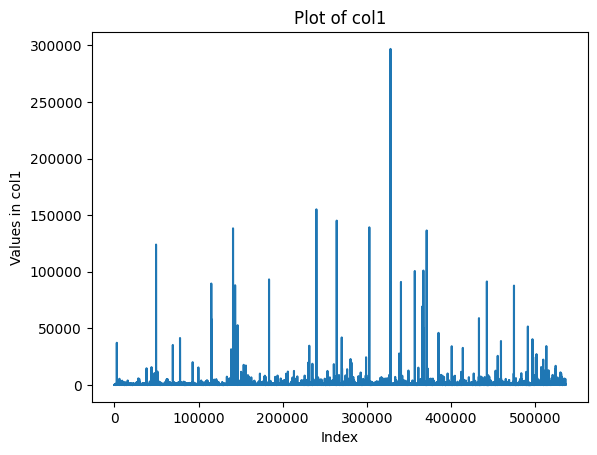

In [40]:
# Plot the 'col1' column
nb["duration_in_minutes"].plot()

# Add labels and title (optional)
plt.xlabel('Index')
plt.ylabel('Values in col1')
plt.title('Plot of col1')

# Display the plot
plt.show()


In [41]:
nb["duration_in_minutes"].count()

534368

NameError: name 'x' is not defined

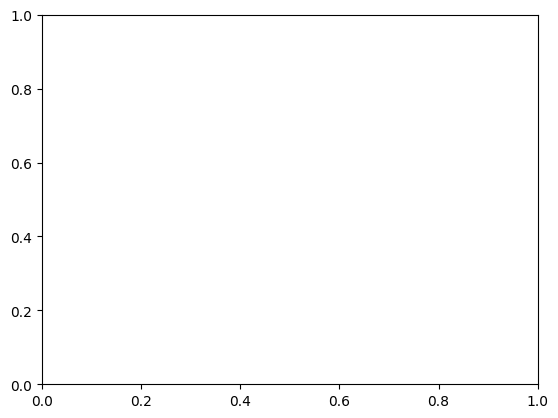

In [42]:
fig, ax = plt.subplots()
ax.plot(x, nb["duration_in_minutes"])
ax.set_title("Sample plot")
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box(df, column_name):
    """
    Plots a box plot for a numeric column in a Pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    column_name (str): The name of the numeric column to be plotted.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    df[column_name].plot(kind='hist', ax=ax)
    ax.set_title(f'Box Plot of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('trips')
    plt.show()


KeyError: 'duration_in_minutes'

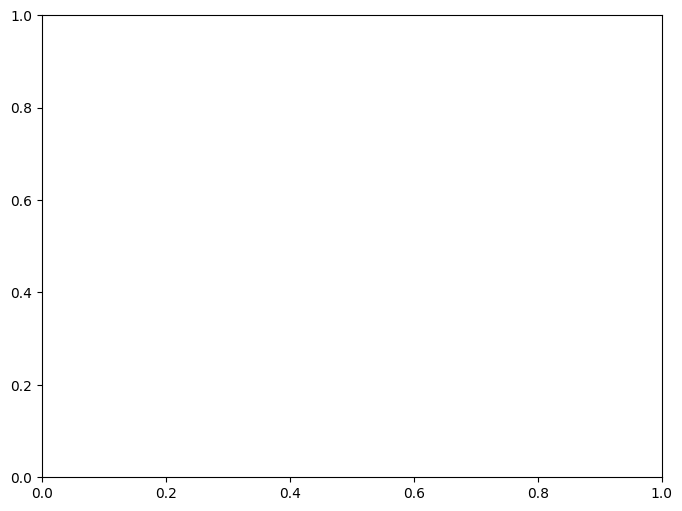

In [9]:
plot_box(nb,"duration_in_minutes")


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box(df, column_name, x_min=None, x_max=None):
    """
    Plots a box plot for a numeric column in a Pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    column_name (str): The name of the numeric column to be plotted.
    x_min (float, optional): The minimum value for the x-axis. If not provided, the default is None.
    x_max (float, optional): The maximum value for the x-axis. If not provided, the default is None.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    df[column_name].plot(kind='box', ax=ax)
    ax.set_title(f'Box Plot of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Value')
    
    # Set the x-axis range if provided
    if x_min is not None and x_max is not None:
        ax.set_xlim(x_min, x_max)
    
    plt.show()


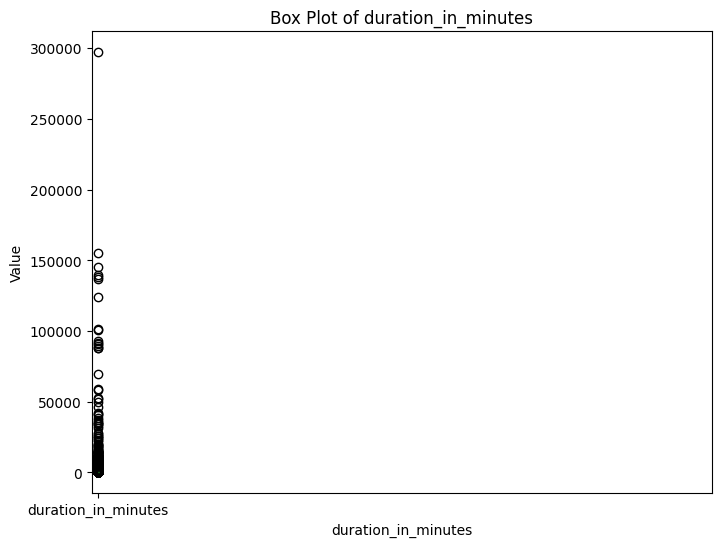

In [46]:
plot_box(nb,"duration_in_minutes", 0, 100)

In [47]:
nb.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time', 'duration_in_minutes'],
      dtype='object')

In [48]:

def plot_time_duration_vs_trip(df, time_duration_col, trip_id_col):
    """
    Plots a scatterplot of trip duration vs. trip_id for a Pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    time_duration_col (str): The name of the column containing the time duration values.
    trip_id_col (str): The name of the column containing the trip ID values.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df[trip_id_col], df[time_duration_col])
    ax.set_title('Time Duration vs. Trip ID')
    ax.set_xlabel(trip_id_col)
    ax.set_ylabel(time_duration_col)
    plt.show()


In [49]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Trip ID              536020 non-null  int64         
 1   Trip Origin          536020 non-null  object        
 2   Trip Destination     536020 non-null  object        
 3   Trip Start Time      534369 non-null  datetime64[ns]
 4   Trip End Time        536019 non-null  datetime64[ns]
 5   duration_in_minutes  534368 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 24.5+ MB


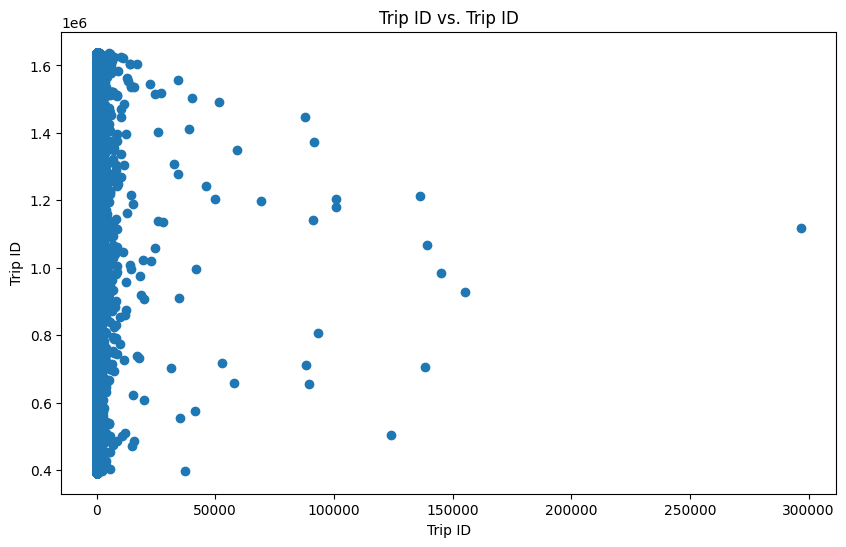

In [15]:
# plot_time_duration_vs_trip(nb, 'Trip ID', 'duration_in_minutes' )
plot_scatter(nb,'duration_in_minutes','Trip ID' )

In [14]:
rpath = os.path.abspath("/home/abdoo/Desktop/w8_causal_inference")
if rpath not in sys.path:
    sys.path.insert(0, rpath)
from src.utilis import plot_scatter
# plot_scatter(nb, 'Trip ID', 'distance_km' )

In [15]:
nb.describe()

,Trip ID,Trip Start Time,Trip End Time,duration_in_minutes,distance_km
count,5.360200e+05,534369,536019,534368.000000,536020.000000
mean,9.910221e+05,2021-10-02 10:24:45.446032896,2021-10-02 15:06:34.897927424,81.605278,12.073743
min,3.919960e+05,2021-07-01 06:21:02,2021-07-01 07:02:23,0.000000,0.000000
25%,6.935610e+05,2021-08-18 13:53:25,2021-08-18 15:36:08.500000,34.000000,5.528929
50%,9.910085e+05,2021-10-05 11:27:22,2021-10-05 14:22:56,53.000000,10.482448
75%,1.281570e+06,2021-11-16 18:32:00,2021-11-17 11:59:15.500000,80.000000,16.970305
max,1.637709e+06,2022-06-13 10:04:28,2022-06-13 10:42:15,296895.000000,680.080847
std,3.456364e+05,NaN,NaN,797.344109,11.021064


In [51]:
nb.isna().sum()

Trip ID                   0
Trip Origin               0
Trip Destination          0
Trip Start Time        1651
Trip End Time             1
duration_in_minutes    1652
dtype: int64

In [5]:
location.isna().sum()


id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [6]:
import pandas as pd
from geopy.distance import geodesic


nb['distance_km'] = nb.apply(lambda row: geodesic((row['Trip Origin']), (row['Trip Destination'])).kilometers, axis=1)

In [8]:
# nb.to_csv("nwe_nb.csv")

In [17]:
nb.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,duration_in_minutes,distance_km
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,2.0,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.0,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.0,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,14.0,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,4.0,20.984319


In [18]:
nb['distance_km'].describe()

count    536020.000000
mean         12.073743
std          11.021064
min           0.000000
25%           5.528929
50%          10.482448
75%          16.970305
max         680.080847
Name: distance_km, dtype: float64

In [24]:
great_distance = (nb['distance_km']> 17).sum()/536020*100
print(f"the trips distacnes above 17 km represent {great_distance.round(2)}% of the distance column")

the trips distacnes above 17 km represent 24.91% of the distance column


In [78]:
nb.isna().sum()

Trip ID                   0
Trip Origin               0
Trip Destination          0
Trip Start Time        1651
Trip End Time             1
distance_km               0
duration_in_minutes    1652
speed_per_hour         1655
km/hr                  1655
dtype: int64

In [5]:
location.columns


Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at'],
      dtype='object')

In [29]:
nb.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Trip ID              536020 non-null  int64         
 1   Trip Origin          536020 non-null  object        
 2   Trip Destination     536020 non-null  object        
 3   Trip Start Time      534369 non-null  datetime64[ns]
 4   Trip End Time        536019 non-null  datetime64[ns]
 5   duration_in_minutes  534368 non-null  float64       
 6   distance_km          536020 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 28.6+ MB


In [41]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file

# Assuming your dataframe is named 'df'
# Load the data into a pandas DataFrame
df = pd.DataFrame({
    'Trip Origin': nb['Trip Origin'],
    'Trip Destination': nb['Trip Destination']
})

# Create a Datashader canvas
canvas = ds.Canvas(plot_width=800, plot_height=600)

# Aggregate the data using Datashader
agg = canvas.points(df, 'Trip Origin', 'Trip Destination', ds.count())

# Visualize the aggregated data using Datashader's transfer functions
img = tf.shade(agg, cmap=['white', 'blue', 'red'], how='log')

# Display the image using Bokeh
output_file("trip_origin_destination.html")
p = figure(title="Trip Origin and Destination Relationship")
p.image_rgba(image=[img.data], x=0, y=0, dw=1, dh=1)
show(p)


ValueError: x must be real

In [10]:
#22224
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import get_provider, CARTODBPOSITRON

# Assuming your dataframe is named 'df'
# Load the data into a pandas DataFrame
df = pd.DataFrame({
    'Trip Origin': nb['Trip Origin'],
    'Trip Destination': nb['Trip Destination']
})

# Split the coordinates into separate latitude and longitude columns
df['origin_lat'], df['origin_lon'] = df['Trip Origin'].str.split(',',  expand=True).astype(float)
df['dest_lat'], df['dest_lon'] = df['Trip Destination'].str.split(',',  expand=True).astype(float)

# Create a Datashader canvas
canvas = ds.Canvas(plot_width=800, plot_height=600, x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
                   y_range=(df['origin_lat'].min(), df['origin_lat'].max()))

# Aggregate the data using Datashader
agg = canvas.line(df, 'origin_lon', 'origin_lat', 'dest_lon', 'dest_lat', ds.count())

# Visualize the aggregated data using Datashader's transfer functions
img = tf.shade(agg, cmap=['white', 'blue', 'red'], how='log')

# Display the image using Bokeh with a tile provider
tile_provider = get_provider(CARTODBPOSITRON)
output_file("trip_routes.html")
p = figure(title="Trip Routes", x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
           y_range=(df['origin_lat'].min(), df['origin_lat'].max()), x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.image_rgba(image=[img.data], x=df['origin_lon'].min(), y=df['origin_lat'].min(),
             dw=df['origin_lon'].max() - df['origin_lon'].min(),
             dh=df['origin_lat'].max() - df['origin_lat'].min())
show(p)


ValueError: 
Line coordinates may be specified by providing both the x and y arguments, or by
providing the geometry argument. Received:
    x: 'origin_lon'
    y: 'origin_lat'
    geometry: <datashader.reductions.count object at 0x77d4a1fd7940>


In [9]:
# @22223
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import get_provider, CARTODBPOSITRON

# Assuming your dataframe is named 'df'
# Load the data into a pandas DataFrame
df = pd.DataFrame({
    'Trip Origin': nb['Trip Origin'],
    'Trip Destination': nb['Trip Destination']
})

# Split the coordinates into separate latitude and longitude columns
df['origin_lat'], df['origin_lon'] = df['Trip Origin'].str.split(',',  expand=True).astype(float)
df['dest_lat'], df['dest_lon'] = df['Trip Destination'].str.split(',',  expand=True).astype(float)

# Create a Datashader canvas
canvas = ds.Canvas(plot_width=800, plot_height=600, x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
                   y_range=(df['origin_lat'].min(), df['origin_lat'].max()))

# Aggregate the data using Datashader
agg = canvas.multi_line(df[['origin_lon', 'dest_lon']].to_numpy(),
                        df[['origin_lat', 'dest_lat']].to_numpy(), ds.count())

# Visualize the aggregated data using Datashader's transfer functions
img = tf.shade(agg, cmap=['white', 'blue', 'red'], how='log')

# Display the image using Bokeh with a tile provider
tile_provider = get_provider(CARTODBPOSITRON)
output_file("trip_routes.html")
p = figure(title="Trip Routes", x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
           y_range=(df['origin_lat'].min(), df['origin_lat'].max()), x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.image_rgba(image=[img.data], x=df['origin_lon'].min(), y=df['origin_lat'].min(),
             dw=df['origin_lon'].max() - df['origin_lon'].min(),
             dh=df['origin_lat'].max() - df['origin_lat'].min())
show(p)


AttributeError: 'Canvas' object has no attribute 'multi_line'

In [47]:
# @22222
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import get_provider, CARTODBPOSITRON

# Assuming your dataframe is named 'df'
# Load the data into a pandas DataFrame
df = pd.DataFrame({
    'Trip Origin': nb['Trip Origin'],
    'Trip Destination': nb['Trip Destination']
})

# Split the coordinates into separate latitude and longitude columns
df['origin_lat'], df['origin_lon'] = df['Trip Origin'].str.split(',',  expand=True).astype(float)
df['dest_lat'], df['dest_lon'] = df['Trip Destination'].str.split(',',  expand=True).astype(float)

# Create a Datashader canvas
canvas = ds.Canvas(plot_width=800, plot_height=600, x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
                   y_range=(df['origin_lat'].min(), df['origin_lat'].max()))

# Aggregate the data using Datashader
agg = canvas.line(df, 'origin_lon', 'origin_lat', 'dest_lon', 'dest_lat', ds.count())

# Visualize the aggregated data using Datashader's transfer functions
img = tf.shade(agg, cmap=['white', 'blue', 'red'], how='log')

# Display the image using Bokeh with a tile provider
tile_provider = get_provider(CARTODBPOSITRON)
output_file("trip_routes.html")
p = figure(title="Trip Routes", x_range=(df['origin_lon'].min(), df['origin_lon'].max()),
          y_range=(df['origin_lat'].min(), df['origin_lat'].max()), x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.image_rgba(image=[img.data], x=df['origin_lon'].min(), y=df['origin_lat'].min(),
             dw=df['origin_lon'].max() - df['origin_lon'].min(),
             dh=df['origin_lat'].max() - df['origin_lat'].min())
show(p)


ValueError: 
Line coordinates may be specified by providing both the x and y arguments, or by
providing the geometry argument. Received:
    x: 'origin_lon'
    y: 'origin_lat'
    geometry: <datashader.reductions.count object at 0x7230e5564a90>


In [34]:
import pandas as pd
from datashader import transfer_functions as tf, Canvas
from datashader.colors import colormap_select
from bokeh.plotting import figure, show
from xarray import Dataset


# Assuming your DataFrame is loaded as 'df'

# Function to convert origin and destination strings into hashable values
# (e.g., zip codes or custom identifiers)
def preprocess_location(loc):
  # Implement your logic to convert location strings into unique identifiers
  # (This example uses a simple hashing for demonstration)
  return hash(loc)

# Preprocess origin and destination columns
nb['origin_id'] = nb['Trip Origin'].apply(preprocess_location)
nb['destination_id'] = nb['Trip Destination'].apply(preprocess_location)

# Aggregate data by origin and destination (assuming origin_id and destination_id are numerical)
aggregation = nb.groupby(['origin_id', 'destination_id']).size()

# Create a datashader canvas
cvs = Canvas(plot_width=800, plot_height=400)

# Select a colormap (adjust based on your preference)
cmap = colormap_select('viridis')

# After creating the aggregation Series...
aggregation_dataarray = Dataset(data_vars={'counts': (['origin_id', 'destination_id'], aggregation.values)},
                                 coords={'origin_id': nb['origin_id'].unique(),
                                        'destination_id': nb['destination_id'].unique()})

# Use aggregation_dataarray instead of aggregation in subsequent steps
aggregator = tf.shade(aggregation_dataarray['counts'], cmap=cmap)


# # Define the aggregation function (count in this case)
# aggregator = tf.shade(aggregation, cmap=cmap)

# Create the image
img = cvs.render(aggregator)

# Create a Bokeh plot to display the image
p = figure(x_range=(0, df['origin_id'].max() + 1), 
            y_range=(0, df['destination_id'].max() + 1),
            title="Trip Origin vs. Destination Distribution")

# Add the datashader image to the plot
p.image(image=[img], x=0, y=0, dw=img.width, dh=img.height)

# Display the plot
show(p)


ValueError: Variable 'counts': Could not convert tuple of form (dims, data[, attrs, encoding]): (['origin_id', 'destination_id'], array([1, 2, 1, ..., 1, 1, 1])) to Variable.

In [40]:
import pandas as pd
from datashader import transfer_functions as tf
import datashader as ds
from datashader.colors import colormap_select
from bokeh.plotting import figure, show
import xarray as xr

# Assuming your DataFrame is loaded as 'df'

# Function to convert origin and destination strings into hashable values
# (e.g., zip codes or custom identifiers)
def preprocess_location(loc):
    # Implement your logic to convert location strings into unique identifiers
    # (This example uses a simple hashing for demonstration)
    return hash(loc)

# Preprocess origin and destination columns
nb['origin_id'] = nb['Trip Origin'].apply(preprocess_location)
nb['destination_id'] = nb['Trip Destination'].apply(preprocess_location)

# Aggregate data by origin and destination (assuming origin_id and destination_id are numerical)
aggregation = nb.groupby(['origin_id', 'destination_id']).size().reset_index(name='counts')

# Create a datashader canvas
cvs = tf.Canvas(plot_width=800, plot_height=400)

# Select a colormap (adjust based on your preference)
cmap = colormap_select('viridis')

# Create the xarray Dataset
aggregation_dataarray = xr.Dataset(
    data_vars={'counts': (['origin_id', 'destination_id'], aggregation['counts'].values)},
    coords={
        'origin_id': aggregation['origin_id'],
        'destination_id': aggregation['destination_id']
    }
)

# Use aggregation_dataarray for subsequent steps
aggregator = tf.shade(aggregation_dataarray['counts'], cmap=cmap)

# Create the image
img = cvs.render(aggregator)

# Create a Bokeh plot to display the image
p = figure(x_range=(0, aggregation['origin_id'].max() + 1), 
           y_range=(0, aggregation['destination_id'].max() + 1),
           title="Trip Origin vs. Destination Distribution")

# Add the datashader image to the plot
p.image(image=[img], x=0, y=0, dw=img.width, dh=img.height)

# Display the plot
show(p)


AttributeError: module 'datashader.transfer_functions' has no attribute 'Canvas'

In [7]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
plt.scatter(location['driver_id'], nb['driver_action'])
plt.xlabel('driver_id')
plt.ylabel('driver_action')
plt.title('Scatter Plot of driver_id and driver_action')
plt.show()


KeyError: 'driver_action'

<Figure size 1000x600 with 0 Axes>

In [26]:
import pandas as pd
import datashader as ds
import colorcet as cc

# # Assuming 'nb' is your DataFrame
# nb[['Trip Origin_x', 'Trip Origin_y']] = nb['Trip Origin'].str.split(',', expand=True).astype(float)
# nb[['Trip Destination_x', 'Trip Destination_y']] = nb['Trip Destination'].str.split(',', expand=True).astype(float)

# # Combine 'Trip Origin_x' and 'Trip Origin_y' into a single float column
# nb['Trip Origin'] = np.column_stack((nb['Trip Origin_x'], nb['Trip Origin_y']))

# # Combine 'Trip Origin_x' and 'Trip Origin_y' into a single float column
# nb['Trip Destination'] = np.column_stack((nb['Trip Destination_x'], nb[ 'Trip Destination_y']))

# Now you can use the new columns for the Datashader plot
agg = ds.Canvas().points(nb, 'Trip Origin', 'Trip Destination')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")


ValueError: x must be real

In [27]:
import datashader as ds, pandas as pd, colorcet

cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(nb, 'Trip Origin', 'Trip Destination')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')
img

ValueError: x must be real

In [88]:
nb.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time', 'distance_km', 'duration_in_minutes', 'speed_per_hour',
       'km/hr', 'Trip Origin_x', 'Trip Origin_y', 'Trip Destination_x',
       'Trip Destination_y'],
      dtype='object')

In [89]:
nb.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance_km,duration_in_minutes,speed_per_hour,km/hr,Trip Origin_x,Trip Origin_y,Trip Destination_x,Trip Destination_y
0,391996,6.508813,6.650970,2021-07-01 07:28:04,2021-07-01 07:29:37,16.123451,2.0,483.703532,483.703532,6.508813,3.377403,6.650970,3.345031
1,391997,6.431671,6.428081,2021-07-01 06:38:04,2021-07-01 07:07:28,1.884305,29.0,3.898562,3.898562,6.431671,3.455538,6.428081,3.472189
2,391998,6.631679,6.508324,2021-07-01 06:21:02,2021-07-01 07:02:23,13.822393,41.0,20.227892,20.227892,6.631679,3.338898,6.508324,3.359040
3,391999,6.572757,6.584881,2021-07-01 07:16:07,2021-07-01 07:29:42,1.511034,14.0,6.475861,6.475861,6.572757,3.367708,6.584881,3.361407
4,392001,6.601042,6.450107,2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,4.0,314.764786,314.764786,6.601042,3.276634,6.450107,3.391615


In [91]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Trip ID              536020 non-null  int64         
 1   Trip Origin          536020 non-null  float64       
 2   Trip Destination     536020 non-null  float64       
 3   Trip Start Time      534369 non-null  datetime64[ns]
 4   Trip End Time        536019 non-null  datetime64[ns]
 5   distance_km          536020 non-null  float64       
 6   duration_in_minutes  534368 non-null  float64       
 7   speed_per_hour       534365 non-null  float64       
 8   km/hr                534365 non-null  float64       
 9   Trip Origin_x        536020 non-null  float64       
 10  Trip Origin_y        536020 non-null  float64       
 11  Trip Destination_x   536020 non-null  float64       
 12  Trip Destination_y   536020 non-null  float64       
dtypes: datetime64[

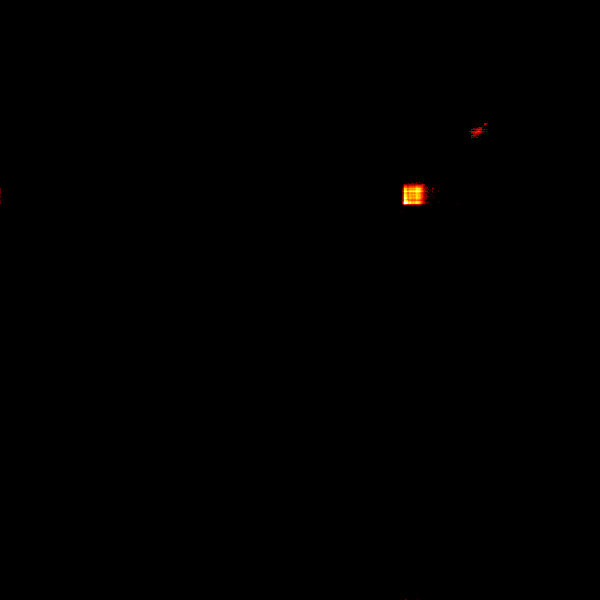

In [94]:
import datashader as ds, colorcet as cc

nb['Trip Origin'] = nb['Trip Origin'].astype(float)
nb['Trip Destination'] = nb['Trip Destination'].astype(float)

agg = ds.Canvas().points(nb, 'Trip Destination', 'Trip Origin')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

In [11]:
# noqa: E501
import numpy as np

from bokeh.layouts import column, gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap, log_cmap

# x = np.random.random(size=2000) * 1000
# y = np.random.normal(size=2000) * 2 + 5
x= nb['Trip Origin']
y = nb['Trip Destination']
source = ColumnDataSource(dict(x=x, y=y))

def make_plot(mapper, palette):
    cmap = mapper("x", palette=palette, low=1, high=1000)
    axis_type = mapper.__name__.split("_")[0] # linear or log

    p = figure(x_range=(1, 1000), title=f"{palette} with {mapper.__name__}",
               toolbar_location=None, tools="", x_axis_type=axis_type)

    r = p.scatter('x', 'y', alpha=0.8, source=source, color=cmap)

    color_bar = r.construct_color_bar(padding=0,
                                      ticker=p.xaxis.ticker,
                                      formatter=p.xaxis.formatter)
    p.add_layout(color_bar, 'below')

    return p

p1 = make_plot(linear_cmap, "Viridis256")
p2 = make_plot(log_cmap, "Viridis256")
p3 = make_plot(linear_cmap, "Viridis6")
p4 = make_plot(log_cmap, "Viridis6")

p5 = figure(x_range=(1, 1000), width=800, height=300, toolbar_location=None, tools="",
            title="Viridis256 with linear_cmap, low/high = 200/800 = pink/grey")
cmap = linear_cmap("x", palette="Viridis256", low=200, high=800,
                   low_color="pink", high_color="darkgrey")
p5.scatter(x='x', y='y', alpha=0.8, source=source, color=cmap)

grid =  gridplot([[p1, p2], [p3, p4]], width=400, height=300, toolbar_location=None)
show(column(grid, p5))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
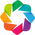

BokehModel(combine_events=True, render_bundle={'docs_json': {'2d10a0d3-141d-415e-998e-a9310265c321': {'version…

In [93]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(nb, ['Trip Origin', 'Trip Destination'])
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=cc.fire, width=900, height=480)

map_tiles * taxi_trips

In [56]:
import datashader as ds, pandas as pd, colorcet
# df  = pd.read_csv('census.csv')
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(nb, 'lng', 'lat')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')

KeyError: "None of [Index(['lng', 'lat'], dtype='object')] are in the [columns]"

In [41]:
rpath = os.path.abspath("/home/abdoo/Desktop/w8_causal_inference")
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.utilis import plot_hist


In [1]:
plot_hist(nb, "duration_in_minutes", "blue")

NameError: name 'plot_hist' is not defined

In [12]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Trip ID              536020 non-null  int64         
 1   Trip Origin          536020 non-null  object        
 2   Trip Destination     536020 non-null  object        
 3   Trip Start Time      534369 non-null  datetime64[ns]
 4   Trip End Time        536019 non-null  datetime64[ns]
 5   duration_in_minutes  534368 non-null  float64       
 6   distance_km          536020 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 28.6+ MB


In [30]:
Q1 = nb["duration_in_minutes"].quantile(0.25)
Q3 = nb["duration_in_minutes"].quantile(0.75)
Q1,Q3

(34.0, 80.0)

In [25]:
IQR = Q3 - Q1
IQR

46.0

In [34]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

def rm_outliers_using_IQR(col_name):
    Q1 = nb["col_name"].quantile(0.25)
    Q3 = nb["col_name"].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(f"lower_limit = {lower_limit}","upper_limit = {upper_limit}")




In [42]:
rm_outliers_using_IQR("duration_in_minutes",nb)

In [37]:
def rm_outliers_using_IQR(col_name, df):
    """
    Removes outliers from a dataframe column using the IQR method.
    
    Args:
        col_name (str): The name of the column to apply the IQR method on.
        df (pandas.DataFrame): The dataframe containing the column.
        
    Returns:
        pandas.DataFrame: The dataframe with outliers removed.
    """
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df_cleaned = df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]
    
    return df_cleaned
